<a href="https://colab.research.google.com/github/YonasBefirdu/TImeSeriesFeatureextractions/blob/main/FEATURE_ENGINEERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
I have too many features for my datapoint. I need to select based on mutual information score with the target(label) column. But I don't know MI scores will be affected by the variation of my features some are discrete and some are continous. I think different MI score calculation must be done for the different numeric types(continous and discrete features)

Here is all the data you need:
"combined_data.xlsx"

## Data loading

### Subtask:
Load the data from the "combined_data.xlsx" file into a pandas DataFrame.


**Reasoning**:
Load the data from the "combined_data.xlsx" file into a pandas DataFrame and display the first 5 rows and the shape of the DataFrame.



In [ ]:
import pandas as pd

try:
    df = pd.read_excel('/content/drive/MyDrive/A_RESEARCH_TRAINING/FEATURE_ENGINEERING_TRADITIONAL_ML/combined_data_2.xlsx')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'combined_data.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,filename,Brachial_0_Area under the curve,Brachial_0_Autocorrelation,Brachial_0_Centroid,Brachial_0_Mean absolute diff,Brachial_0_Mean diff,Brachial_0_Median absolute diff,Brachial_0_Median diff,Brachial_0_Negative turning points,Brachial_0_Neighbourhood peaks,...,Velocity_0_Wavelet variance_0.83Hz,Velocity_0_Wavelet variance_0.94Hz,Velocity_0_Wavelet variance_1.07Hz,Velocity_0_Wavelet variance_1.25Hz,Velocity_0_Wavelet variance_1.5Hz,Velocity_0_Wavelet variance_1.88Hz,Velocity_0_Wavelet variance_2.5Hz,Velocity_0_Wavelet variance_3.75Hz,Velocity_0_Wavelet variance_7.5Hz,risk_label
0,6249856R,470.946655,15,2.024086,0.991790,0.004591,0.582075,-0.479681,2,2,...,1395.690168,987.391215,668.111792,440.497639,297.440112,198.519921,110.802873,45.739170,15.281020,1
1,6182440R,469.009724,17,1.932777,1.305323,0.004913,0.742390,-0.675839,4,2,...,1771.534722,1495.328180,1286.248347,1092.807283,871.351958,603.386123,335.172935,124.116260,12.806146,1
2,9226581R,436.693778,17,2.004933,1.124935,0.008923,0.736705,-0.513164,1,1,...,2254.223436,1772.501678,1378.917661,1028.757494,711.058963,424.637375,193.275909,52.019184,5.858131,1
3,6405034R,356.326977,16,1.953829,0.986397,0.005729,0.589127,-0.488951,1,1,...,587.807532,420.154946,287.651021,187.956567,125.476764,95.401691,68.686956,28.974687,6.179533,1
4,763607L,488.102621,18,2.026210,1.267127,0.000000,0.942074,-0.749698,3,1,...,727.963743,645.377210,569.998089,479.967809,369.123987,242.822934,122.716389,38.716597,4.364633,1


(150, 203)


## Data exploration

### Subtask:
Explore the dataset to understand its characteristics, identify data types, and determine the target variable.


**Reasoning**:
Explore the dataset to understand its characteristics, identify data types, and determine the target variable. Check for missing values and note the total number of features.



In [ ]:
# Identify data types and target variable
data_types = df.dtypes
print("Data Types:\n", data_types)

target_variable = "risk_label"  # Assuming 'risk_label' is the target variable
print("\nTarget Variable:", target_variable)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Total number of features
num_features = len(df.columns) -2 # subtract 1 for the target variablen and file_name
print("\nTotal number of features:", num_features)

# Summarize findings (this part can be improved based on the data)
print("\nSummary:")
print("The dataset contains a mix of numerical and potentially categorical features.")
print("The target variable is 'risk_label'.")
print("There appear to be no missing values based on initial scan. Further investigation might be needed.") # Need to refine this statement later
print(f"The dataset has a total of {num_features} features.")

Data Types:
 filename                               object
Brachial_0_Area under the curve       float64
Brachial_0_Autocorrelation              int64
Brachial_0_Centroid                   float64
Brachial_0_Mean absolute diff         float64
                                       ...   
Velocity_0_Wavelet variance_1.88Hz    float64
Velocity_0_Wavelet variance_2.5Hz     float64
Velocity_0_Wavelet variance_3.75Hz    float64
Velocity_0_Wavelet variance_7.5Hz     float64
risk_label                              int64
Length: 203, dtype: object

Target Variable: risk_label

Missing Values:
 filename                              0
Brachial_0_Area under the curve       0
Brachial_0_Autocorrelation            0
Brachial_0_Centroid                   0
Brachial_0_Mean absolute diff         0
                                     ..
Velocity_0_Wavelet variance_1.88Hz    0
Velocity_0_Wavelet variance_2.5Hz     0
Velocity_0_Wavelet variance_3.75Hz    0
Velocity_0_Wavelet variance_7.5Hz     0
risk_la

## Data preparation

### Subtask:
Handle any missing values and prepare the data for mutual information calculation.



Check for missing values represented as special strings, impute missing values, and separate features into continuous and discrete groups.



In [ ]:
import numpy as np

# Check for missing values represented as special strings
missing_values = df.isin(['?', 'NA', 'N/A', 'NaN', 'None', ' ']).sum()
print("Missing values (special strings):\n", missing_values)

# Imputation strategy
for col in df.columns:
    if df[col].dtype == 'object':
        # Impute categorical features with the mode
        mode_val = df[col].mode()[0]
        df[col] = df[col].replace(['?', 'NA', 'N/A', 'NaN', 'None', ' '], mode_val)
    elif df[col].dtype in ['int64', 'float64']:
        # Impute numerical features with the median
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        # Check for infinite values and replace them with NaN
        df[col] = df[col].replace([np.inf, -np.inf], np.nan)
        # Impute NaN values with the median
        df[col] = df[col].fillna(median_val)
    else:
        print(f"Column {col} has an unsupported data type.")



Missing values (special strings):
 filename                              0
Brachial_0_Area under the curve       0
Brachial_0_Autocorrelation            0
Brachial_0_Centroid                   0
Brachial_0_Mean absolute diff         0
                                     ..
Velocity_0_Wavelet variance_1.88Hz    0
Velocity_0_Wavelet variance_2.5Hz     0
Velocity_0_Wavelet variance_3.75Hz    0
Velocity_0_Wavelet variance_7.5Hz     0
risk_label                            0
Length: 203, dtype: int64


## Feature engineering

### Subtask:
Separate the continuous and discrete features from the main dataframe `df` into two new dataframes.



Create two new dataframes, `df_continuous` and `df_discrete`, containing the continuous and discrete features respectively, along with the target variable.



In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame

#Normalizing section
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
scaler = MinMaxScaler()


# Separate features into continuous and discrete groups
continuous_features = []
discrete_features = []

for col in df.columns:
    if col in ['risk_label', 'filename']:  # Exclude target variable and non-numeric identifiers
        continue

    # Check if all values in the column are integers
    if all(isinstance(x, (int, float)) and (float(x).is_integer() if isinstance(x, float) else True) for x in df[col].dropna()):
        discrete_features.append(col)
    else:
        continuous_features.append(col)

print("Continuous features:", continuous_features)
print("Discrete features:", discrete_features)
df_general = pd.concat([df[continuous_features], df[discrete_features]], axis=1)
df_general['risk_label'] = df['risk_label']
print(df_general.shape)
# Create DataFrames for continuous and discrete features
df_continuous = df[continuous_features + ['risk_label']].copy()
df_discrete = df[discrete_features + ['risk_label']].copy()
#df_discrete = pd.get_dummies(df_discrete, columns=df_discrete.columns[:-1], drop_first=True, dtype=int)  # Exclude 'risk_label'
# Display the first few rows of the new DataFrames to verify
display(df_continuous.head(),df_continuous.shape)
display(df_discrete.head(),df_discrete.shape)


Continuous features: ['Brachial_0_Area under the curve', 'Brachial_0_Centroid', 'Brachial_0_Mean absolute diff', 'Brachial_0_Mean diff', 'Brachial_0_Median absolute diff', 'Brachial_0_Median diff', 'Brachial_0_Signal distance', 'Brachial_0_Slope', 'Brachial_0_Sum absolute diff', 'Carotid_0_Area under the curve', 'Carotid_0_Centroid', 'Carotid_0_Mean absolute diff', 'Carotid_0_Mean diff', 'Carotid_0_Median absolute diff', 'Carotid_0_Median diff', 'Carotid_0_Signal distance', 'Carotid_0_Slope', 'Carotid_0_Sum absolute diff', 'Brachial_0_Absolute energy', 'Brachial_0_Average power', 'Brachial_0_ECDF Percentile Count_0', 'Brachial_0_ECDF Percentile Count_1', 'Brachial_0_ECDF Percentile_0', 'Brachial_0_ECDF Percentile_1', 'Brachial_0_ECDF_0', 'Brachial_0_ECDF_1', 'Brachial_0_ECDF_2', 'Brachial_0_ECDF_3', 'Brachial_0_ECDF_4', 'Brachial_0_ECDF_5', 'Brachial_0_ECDF_6', 'Brachial_0_ECDF_7', 'Brachial_0_ECDF_8', 'Brachial_0_ECDF_9', 'Brachial_0_Entropy', 'Brachial_0_Histogram mode', 'Brachial_0_

,Brachial_0_Area under the curve,Brachial_0_Centroid,Brachial_0_Mean absolute diff,Brachial_0_Mean diff,Brachial_0_Median absolute diff,Brachial_0_Median diff,Brachial_0_Signal distance,Brachial_0_Slope,Brachial_0_Sum absolute diff,Carotid_0_Area under the curve,...,Velocity_0_Wavelet variance_0.83Hz,Velocity_0_Wavelet variance_0.94Hz,Velocity_0_Wavelet variance_1.07Hz,Velocity_0_Wavelet variance_1.25Hz,Velocity_0_Wavelet variance_1.5Hz,Velocity_0_Wavelet variance_1.88Hz,Velocity_0_Wavelet variance_2.5Hz,Velocity_0_Wavelet variance_3.75Hz,Velocity_0_Wavelet variance_7.5Hz,risk_label
0,470.946655,2.024086,0.991790,0.004591,0.582075,-0.479681,194.050782,-0.097046,125.957341,27.953096,...,1395.690168,987.391215,668.111792,440.497639,297.440112,198.519921,110.802873,45.739170,15.281020,1
1,469.009724,1.932777,1.305323,0.004913,0.742390,-0.675839,230.812921,-0.201260,165.776056,30.641779,...,1771.534722,1495.328180,1286.248347,1092.807283,871.351958,603.386123,335.172935,124.116260,12.806146,1
2,436.693778,2.004933,1.124935,0.008923,0.736705,-0.513164,203.567900,-0.104731,142.866806,28.803927,...,2254.223436,1772.501678,1378.917661,1028.757494,711.058963,424.637375,193.275909,52.019184,5.858131,1
3,356.326977,1.953829,0.986397,0.005729,0.589127,-0.488951,192.819210,-0.131185,125.272359,28.087740,...,587.807532,420.154946,287.651021,187.956567,125.476764,95.401691,68.686956,28.974687,6.179533,1
4,488.102621,2.026210,1.267127,0.000000,0.942074,-0.749698,216.861720,-0.090788,160.925121,29.628752,...,727.963743,645.377210,569.998089,479.967809,369.123987,242.822934,122.716389,38.716597,4.364633,1


(150, 190)

,Brachial_0_Autocorrelation,Brachial_0_Negative turning points,Brachial_0_Neighbourhood peaks,Brachial_0_Positive turning points,Brachial_0_Zero crossing rate,Carotid_0_Autocorrelation,Carotid_0_Negative turning points,Carotid_0_Neighbourhood peaks,Carotid_0_Positive turning points,Carotid_0_Zero crossing rate,Velocity_0_Spectral positive turning points,Velocity_0_Spectral roll-on,risk_label
0,15,2,2,2,0,18,3,1,2,0,16,0,1
1,17,4,2,4,0,19,8,1,8,0,14,0,1
2,17,1,1,1,0,16,4,2,4,0,17,0,1
3,16,1,1,1,0,17,2,2,2,0,14,0,1
4,18,3,1,3,0,18,4,1,4,0,17,0,1


(150, 13)

## Data analysis

### Subtask:
Calculate the mutual information scores for continuous and discrete features with the target variable.


**Reasoning**:
Calculate the mutual information scores for continuous features using mutual_info_regression and store them in a dictionary. df_discrete MI calculation for discrete features in this step. Then combine the two dictionaries into a single dictionary.



In [ ]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

#  Create scaler object
scaler = StandardScaler()
df_c_label=df_continuous['risk_label']
# Normalize continuous features
#avoid normalization of risk_label
df_continuous=df_continuous.drop('risk_label', axis=1)
# Normalize continuous features
df_continuous = pd.DataFrame(scaler.fit_transform(df_continuous), columns=df_continuous.columns, index=df_continuous.index)

# # Discrete features are typically not normalized, but if you have specific reasons to, you can apply appropriate techniques
# # ...

{'Brachial_0_Area under the curve': np.float64(0.0), 'Brachial_0_Centroid': np.float64(0.008863078038103156), 'Brachial_0_Mean absolute diff': np.float64(0.0339347364948388), 'Brachial_0_Mean diff': np.float64(0.05247172935063049), 'Brachial_0_Median absolute diff': np.float64(0.0), 'Brachial_0_Median diff': np.float64(0.0), 'Brachial_0_Signal distance': np.float64(0.027163110127936596), 'Brachial_0_Slope': np.float64(0.017418351501022666), 'Brachial_0_Sum absolute diff': np.float64(0.03349029205039433), 'Carotid_0_Area under the curve': np.float64(0.042354784569685444), 'Carotid_0_Centroid': np.float64(0.0742390880444177), 'Carotid_0_Mean absolute diff': np.float64(0.034999009868557085), 'Carotid_0_Mean diff': np.float64(0.06253733702117659), 'Carotid_0_Median absolute diff': np.float64(0.0), 'Carotid_0_Median diff': np.float64(0.005705628970478216), 'Carotid_0_Signal distance': np.float64(0.030063015689109296), 'Carotid_0_Slope': np.float64(0.11588558460304688), 'Carotid_0_Sum absolu

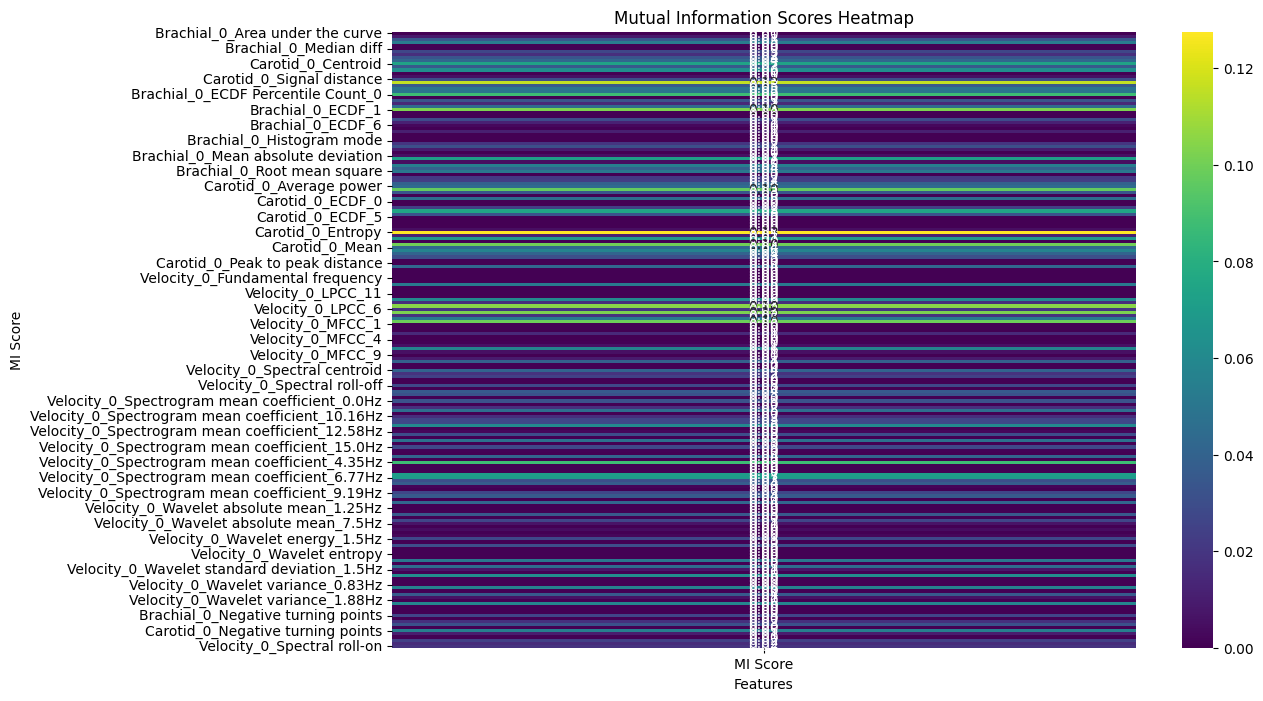

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import normalized_mutual_info_score
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate MI scores for continuous features
mi_scores_continuous = {}
# for col in df_continuous.columns:
#     if col != 'risk_label':
#         mi_scores_continuous[col] = mutual_info_regression(df_continuous[[col]], df_continuous['risk_label'], random_state=37)[0]

score_d=mutual_info_classif(df_discrete.drop('risk_label', axis=1), df_discrete['risk_label'], random_state=37)

score_c=mutual_info_classif(df_continuous, df_c_label, random_state=37)

#mi_dict =
# Calculate MI scores for discrete features
feature_names_d = df_discrete.drop('risk_label', axis=1).columns
feature_names_c = df_continuous.columns
mi_scores_discrete = dict(zip(feature_names_d, score_d))
# for col in df_discrete.columns:
#     if col != 'risk_label':
#         mi_scores_discrete[col] =
mi_scores_continuous = dict(zip(feature_names_c, score_c))
# Combine MI scores
mi_scores = {**mi_scores_continuous, **mi_scores_discrete}

print(mi_scores)
print(type(mi_scores))

#HEATMAP
# Convert the mi_scores dictionary to a DataFrame for easier plotting
mi_df = pd.DataFrame(mi_scores, index=['MI Score']).T

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(mi_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mutual Information Scores Heatmap')
plt.xlabel('Features')
plt.ylabel('MI Score')
plt.show()

## Data visualization

### Subtask:
Visualize the calculated mutual information (MI) scores.


**Reasoning**:
Visualize the MI scores using a bar chart, color-coding by feature type, sorting by MI score, and saving the chart.



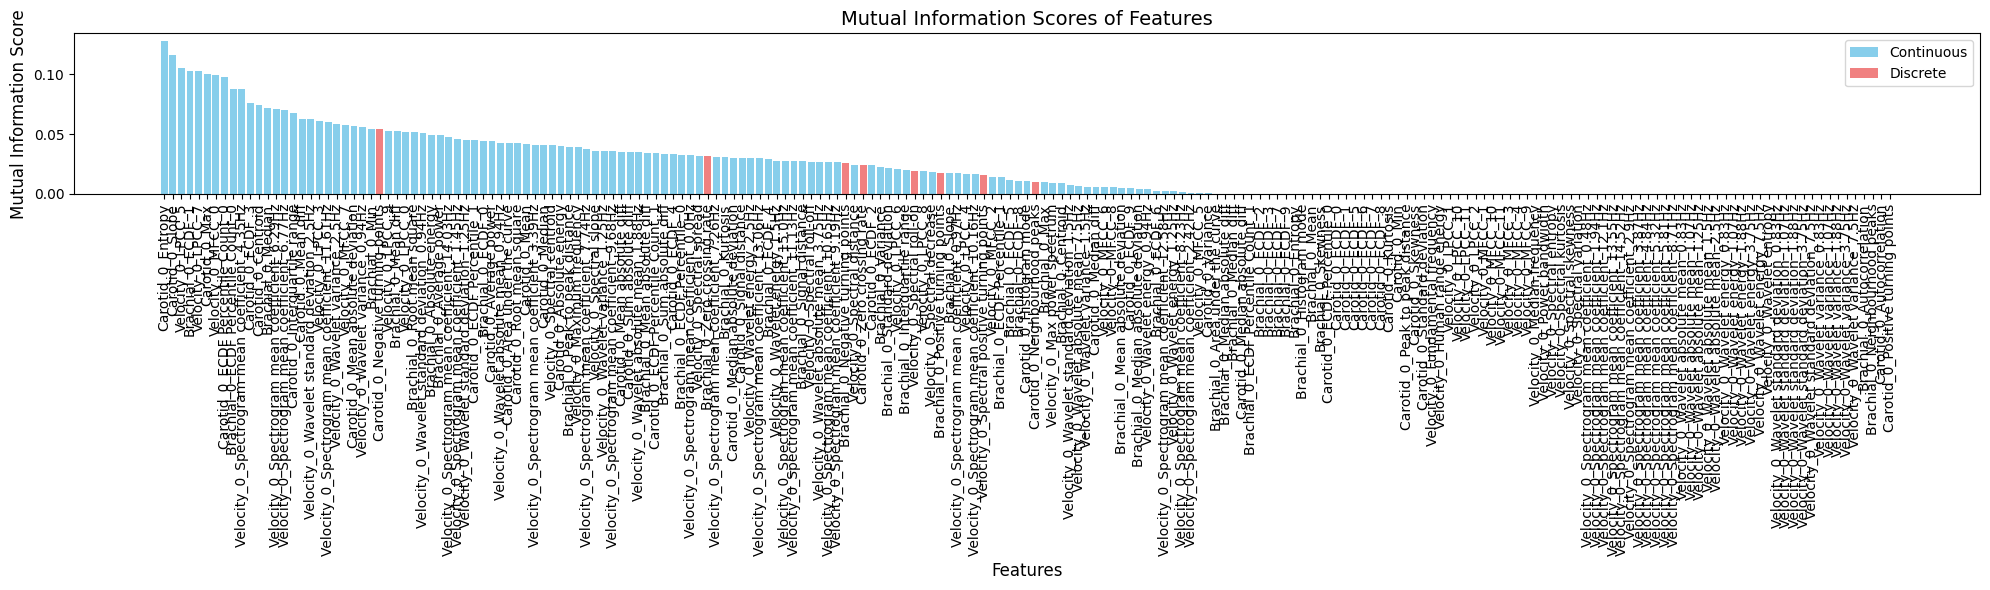

4.522921139562803


In [ ]:
import matplotlib.pyplot as plt

# Sort MI scores in descending order
sorted_mi_scores = dict(sorted(mi_scores.items(), key=lambda item: item[1], reverse=True))

# Prepare data for plotting
features = list(sorted_mi_scores.keys())
mi_values = list(sorted_mi_scores.values())

feature_types = []
for feature in features:
    if feature in continuous_features:
        feature_types.append('Continuous')
    elif feature in discrete_features:
        feature_types.append('Discrete')
    else:
        feature_types.append('Unknown')  # Handle cases where feature type is not defined


# Create the bar chart
plt.figure(figsize=(20, 6))  # Adjust figure size as needed
bars = plt.bar(features, mi_values, color=['skyblue' if t == 'Continuous' else 'lightcoral' for t in feature_types])

# Customize the chart
plt.xlabel("Features", fontsize=12)
plt.ylabel("Mutual Information Score", fontsize=12)
plt.title("Mutual Information Scores of Features", fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping


# Add a legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='skyblue', label='Continuous'),
                   Patch(facecolor='lightcoral', label='Discrete')]
plt.legend(handles=legend_elements, loc='upper right')

# Save the chart
plt.savefig("mi_scores.png")

plt.show()
print(sum(mi_values))



### Subtask: SELECT TOP FEATURES BASED ON MI
Select the top N features based on their mutual information scores.


**Reasoning**:
Select top N features based on MI scores from the visualization, create lists of selected features, and print the results.



1.6993926866262268


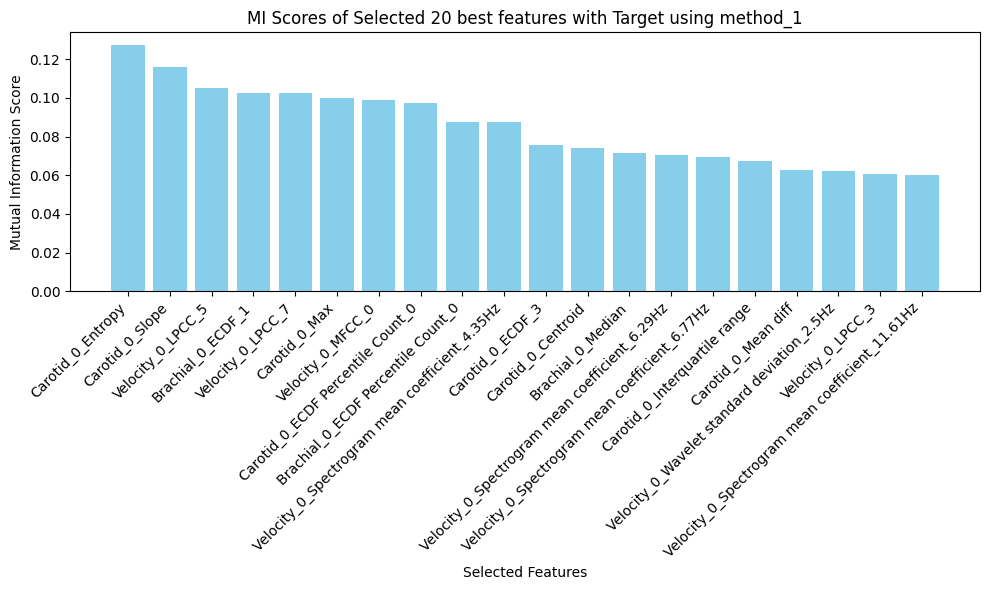

Selected top 20 features:
Carotid_0_Entropy: 0.1275823156237934
Carotid_0_Slope: 0.11588558460304688
Velocity_0_LPCC_5: 0.10494995173391919
Brachial_0_ECDF_1: 0.10264777315008167
Velocity_0_LPCC_7: 0.1023862660970627
Carotid_0_Max: 0.09976038666739306
Velocity_0_MFCC_0: 0.09885741942934523
Carotid_0_ECDF Percentile Count_0: 0.09755792934453789
Brachial_0_ECDF Percentile Count_0: 0.08764538263000188
Velocity_0_Spectrogram mean coefficient_4.35Hz: 0.08737811212120294
Carotid_0_ECDF_3: 0.07549093758374958
Carotid_0_Centroid: 0.0742390880444177
Brachial_0_Median: 0.07139229881514408
Velocity_0_Spectrogram mean coefficient_6.29Hz: 0.07066658527286696
Velocity_0_Spectrogram mean coefficient_6.77Hz: 0.0696590758122122
Carotid_0_Interquartile range: 0.06746488274190532
Carotid_0_Mean diff: 0.06253733702117659
Velocity_0_Wavelet standard deviation_2.5Hz: 0.06229100842527879
Velocity_0_LPCC_3: 0.06072092735744272
Velocity_0_Spectrogram mean coefficient_11.61Hz: 0.060279424151648

Selected Contin

In [ ]:
# Based on the mi_scores.png visualization, select top 50 features.
# You should replace this with your actual selection based on the visualization.

N = 20
selected_features_2 = list(sorted_mi_scores.keys())[:N]
print(sum(list(sorted_mi_scores.values())[:N]))

features = selected_features_2
mi_values = list(sorted_mi_scores.values())[:N]

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(features, mi_values, color='skyblue')
plt.xlabel("Selected Features")
plt.ylabel("Mutual Information Score")
plt.title("MI Scores of Selected 20 best features with Target using method_1")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

print(f"Selected top {N} features:")
for feature in selected_features_2:
  print(f"{feature}: {sorted_mi_scores[feature]}")

 # Determine which of the selected features are continuous and which are discrete
selected_continuous_features = [
    feature for feature in selected_features_2 if feature in continuous_features
]
selected_discrete_features = [
    feature for feature in selected_features_2 if feature in discrete_features
]

print("\nSelected Continuous Features:", selected_continuous_features)
print("\nSelected Discrete Features:", selected_discrete_features)

###I then did a correlation heatmap of these 20 features, if they have some kind of r/ship between them.

In [ ]:
df[selected_features_2].head()

,Carotid_0_Entropy,Carotid_0_Slope,Velocity_0_LPCC_5,Brachial_0_ECDF_1,Velocity_0_LPCC_7,Carotid_0_Max,Velocity_0_MFCC_0,Carotid_0_ECDF Percentile Count_0,Brachial_0_ECDF Percentile Count_0,Velocity_0_Spectrogram mean coefficient_4.35Hz,Carotid_0_ECDF_3,Carotid_0_Centroid,Brachial_0_Median,Velocity_0_Spectrogram mean coefficient_6.29Hz,Velocity_0_Spectrogram mean coefficient_6.77Hz,Carotid_0_Interquartile range,Carotid_0_Mean diff,Velocity_0_Wavelet standard deviation_2.5Hz,Velocity_0_LPCC_3,Velocity_0_Spectrogram mean coefficient_11.61Hz
0,0.997768,0.000436,0.658444,0.015625,0.658444,6.827463,16.792492,6.4285,25.0000,1.288152,0.03125,2.122439,113.677342,1.072629,0.837703,0.235829,0.000000e+00,10.526294,0.725551,0.039357
1,0.997768,-0.001378,0.283275,0.015625,0.283275,7.539016,27.004033,6.9781,25.0000,0.037587,0.03125,2.099055,109.325934,0.717278,0.037509,0.442449,0.000000e+00,18.307729,0.635924,0.242505
2,0.997768,-0.001552,0.504242,0.015625,0.504242,7.068883,41.514504,6.5876,25.0000,0.764805,0.03125,2.095682,102.677946,0.340519,0.038376,0.298551,0.000000e+00,13.902371,0.777286,0.053928
3,1.000000,0.001176,0.472003,0.015625,0.472003,6.779163,7.387814,25.0000,25.0000,1.159613,0.03125,2.132470,82.390708,0.404193,1.021075,0.242882,-4.134986e-10,8.287759,0.863691,0.043345
4,1.000000,-0.000080,0.487164,0.015625,0.487164,7.271993,30.525106,25.0000,83.3687,1.176023,0.03125,2.115315,116.007174,0.360557,0.205365,0.298696,-1.283570e-05,11.077743,0.663234,0.013636


##There are some features('Brachial_0_ECDF_1','Carotid_0_ECDF_3') with constant value, which may appear to be high MI but doesn't benefit the model and has 0 correlation coefficient, making our **heat map** empty in the column

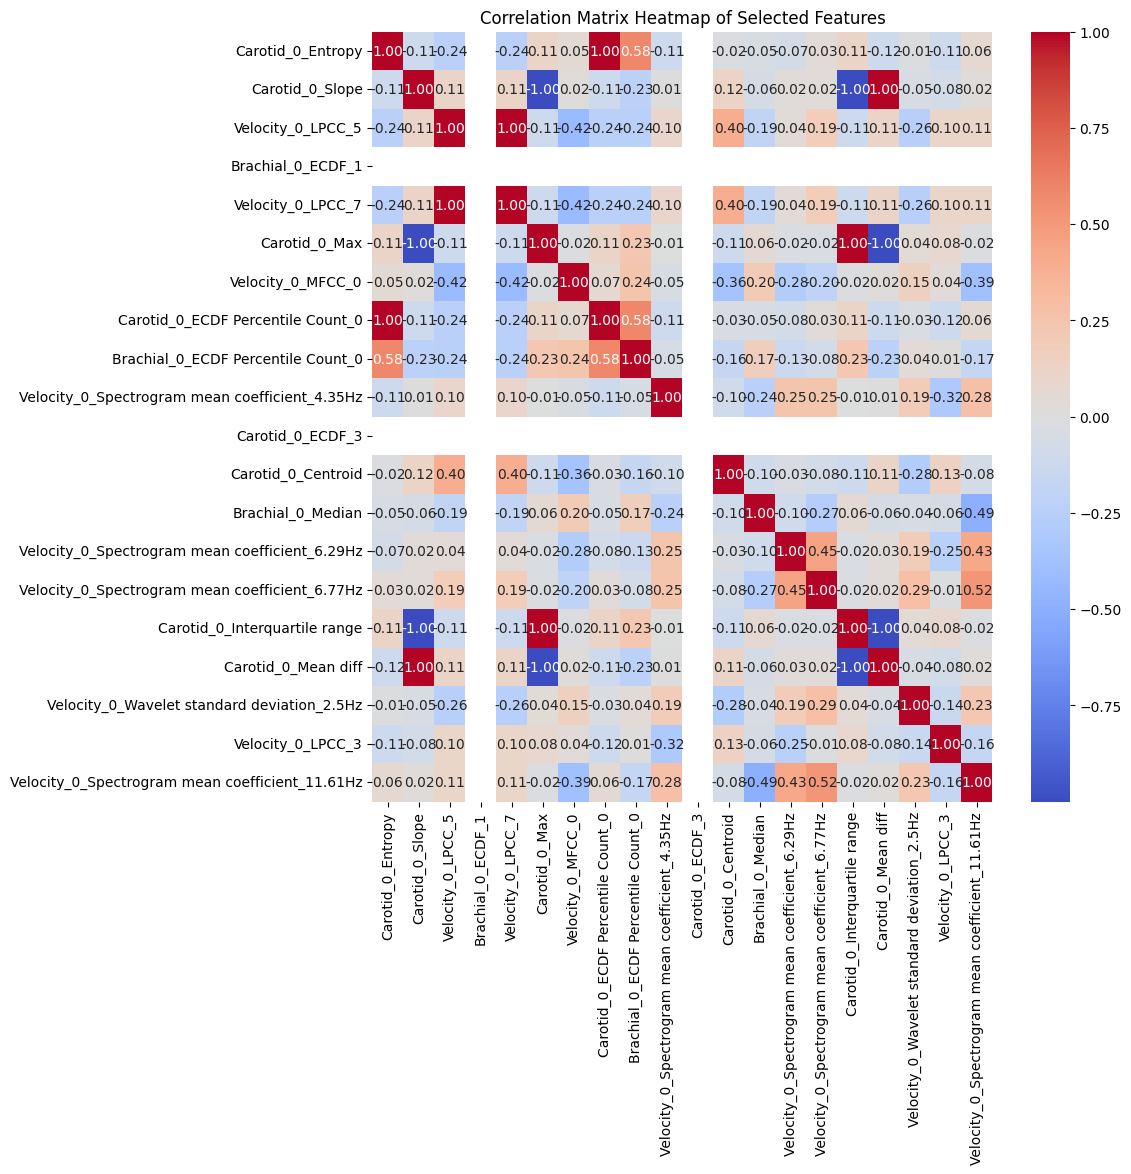

In [ ]:
# prompt: there's a list with named 'selected_continuous_features' with 20 column names in it.  And a dataframe named 'df' which has those columns that are named in the list. Make a 10 by 10 2d heatmap colored by correlation values between each of teh 20 columns that shows correlation r/ship

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' and 'selected_continuous_features' are defined as in your code

# Calculate the correlation matrix for the selected continuous features
correlation_matrix = df[selected_features_2].corr()

# Create the heatmap
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Selected Features')
plt.show()


In [ ]:
correlation_matrix.head()

,Carotid_0_Entropy,Carotid_0_Slope,Velocity_0_LPCC_5,Brachial_0_ECDF_1,Velocity_0_LPCC_7,Carotid_0_Max,Velocity_0_MFCC_0,Carotid_0_ECDF Percentile Count_0,Brachial_0_ECDF Percentile Count_0,Velocity_0_Spectrogram mean coefficient_4.35Hz,Carotid_0_ECDF_3,Carotid_0_Centroid,Brachial_0_Median,Velocity_0_Spectrogram mean coefficient_6.29Hz,Velocity_0_Spectrogram mean coefficient_6.77Hz,Carotid_0_Interquartile range,Carotid_0_Mean diff,Velocity_0_Wavelet standard deviation_2.5Hz,Velocity_0_LPCC_3,Velocity_0_Spectrogram mean coefficient_11.61Hz
Carotid_0_Entropy,1.000000,-0.114057,-0.236116,NaN,-0.236116,0.114255,0.048864,0.996524,0.584468,-0.113896,NaN,-0.019700,-0.045757,-0.074930,0.032001,0.114556,-0.115116,-0.012453,-0.114304,0.063655
Carotid_0_Slope,-0.114057,1.000000,0.112269,NaN,0.112269,-0.999984,0.016020,-0.113755,-0.233389,0.005315,NaN,0.117249,-0.055681,0.024154,0.023798,-0.999987,0.999921,-0.045793,-0.079495,0.020120
Velocity_0_LPCC_5,-0.236116,0.112269,1.000000,NaN,1.000000,-0.110118,-0.422236,-0.241194,-0.244290,0.098947,NaN,0.397702,-0.188322,0.036235,0.185027,-0.110581,0.110082,-0.256007,0.103757,0.105626
Brachial_0_ECDF_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Velocity_0_LPCC_7,-0.236116,0.112269,1.000000,NaN,1.000000,-0.110118,-0.422236,-0.241194,-0.244290,0.098947,NaN,0.397702,-0.188322,0.036235,0.185027,-0.110581,0.110082,-0.256007,0.103757,0.105626


### Remove constant column(features)

In [ ]:
selected_features_2.remove('Brachial_0_ECDF_1')
selected_features_2.remove('Carotid_0_ECDF_3')
print(selected_features_2)

['Carotid_0_Entropy', 'Carotid_0_Slope', 'Velocity_0_LPCC_5', 'Velocity_0_LPCC_7', 'Carotid_0_Max', 'Velocity_0_MFCC_0', 'Carotid_0_ECDF Percentile Count_0', 'Brachial_0_ECDF Percentile Count_0', 'Velocity_0_Spectrogram mean coefficient_4.35Hz', 'Carotid_0_Centroid', 'Brachial_0_Median', 'Velocity_0_Spectrogram mean coefficient_6.29Hz', 'Velocity_0_Spectrogram mean coefficient_6.77Hz', 'Carotid_0_Interquartile range', 'Carotid_0_Mean diff', 'Velocity_0_Wavelet standard deviation_2.5Hz', 'Velocity_0_LPCC_3', 'Velocity_0_Spectrogram mean coefficient_11.61Hz']


#NOW LET'S SEE THE NEW HEATMAP


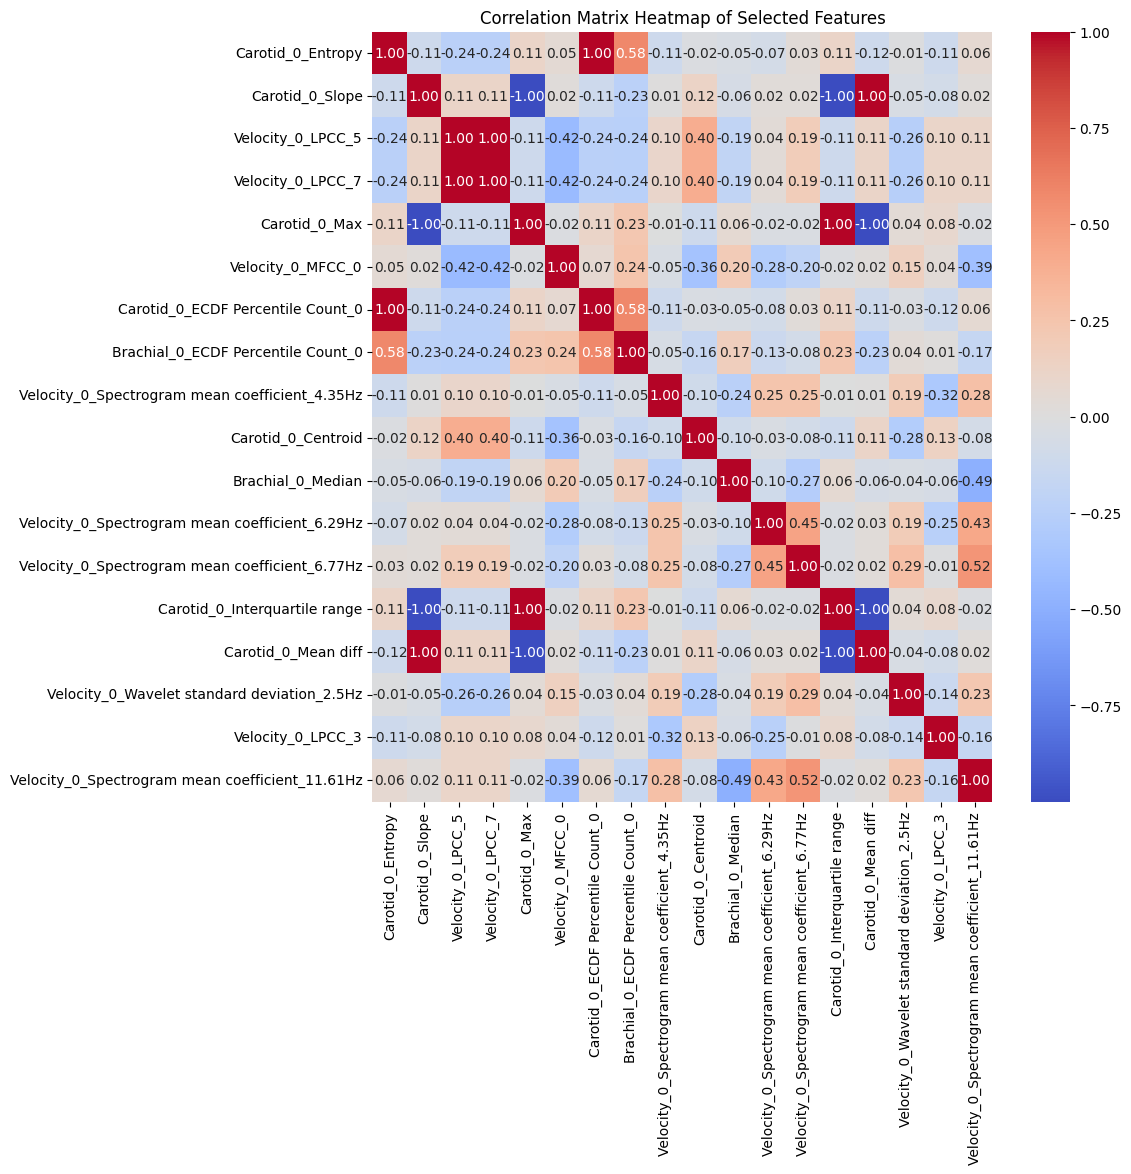

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' and 'selected_continuous_features' are defined as in your code

# Calculate the correlation matrix for the selected continuous features
correlation_matrix = df[selected_features_2].corr()

# Create the heatmap
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Selected Features')
plt.show()

### ⚔ I then removed features with perfect collinearity(positive and negative), chose one and dropped the other based on Mutual information score.
[link text](https://github.com/pycaret/pycaret/discussions/1486)

In [ ]:
#Format to 2 significant features
formatted_corr_matrix = correlation_matrix.round(2)

##THEN FIND PERFECTLY COLLINEAR FEATURES AND PICK ONE BASED ON MI


In [ ]:
import pandas as pd

def find_perfect_correlations(corr_matrix):
    """
    Identify feature pairs with perfect correlation (1.0 or -1.0) from a correlation matrix.

    Parameters:
    corr_matrix (pd.DataFrame): A pandas DataFrame representing the correlation matrix.

    Returns:
    list: A list of tuples containing feature pairs and their correlation values.
    """
    perfect_pairs = []
    features = corr_matrix.columns
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if i != j:
              corr_value = corr_matrix.iloc[i, j]
              if corr_value == 1.00 or corr_value == -1.00:
                perfect_pairs.append((features[i], features[j], corr_value))
    return perfect_pairs

# Example usage:
# Assuming `corr_matrix` is your precomputed correlation matrix:
# perfect_corrs = find_perfect_correlations(corr_matrix)
# for pair in perfect_corrs:
#     print(f"Features {pair[0]} and {pair[1]} have correlation: {pair[2]}")
print(find_perfect_correlations(formatted_corr_matrix))

[('Carotid_0_Entropy', 'Carotid_0_ECDF Percentile Count_0', np.float64(1.0)), ('Carotid_0_Slope', 'Carotid_0_Max', np.float64(-1.0)), ('Carotid_0_Slope', 'Carotid_0_Interquartile range', np.float64(-1.0)), ('Carotid_0_Slope', 'Carotid_0_Mean diff', np.float64(1.0)), ('Velocity_0_LPCC_5', 'Velocity_0_LPCC_7', np.float64(1.0)), ('Carotid_0_Max', 'Carotid_0_Interquartile range', np.float64(1.0)), ('Carotid_0_Max', 'Carotid_0_Mean diff', np.float64(-1.0)), ('Carotid_0_Interquartile range', 'Carotid_0_Mean diff', np.float64(-1.0))]


***Picking*** uncorrelated features and left with 13 features

In [ ]:
for feature in ['Carotid_0_ECDF Percentile Count_0','Carotid_0_Max','Carotid_0_Interquartile range','Carotid_0_Mean diff','Velocity_0_LPCC_7']:
  if feature in selected_features_2:
    selected_features_2.remove(feature)
print(len(selected_features_2))

13


# 2, BEFORE WE DO PCA, LET'S TRY mRMR feature selection on the 202 original whole dataset.

In [ ]:
pip install mrmr_selection

In [ ]:
import mrmr
from mrmr import mrmr_classif
X= df_general.drop('risk_label',axis=1)
y=df_general['risk_label']

#select top 10 features
selected_features = mrmr_classif(X, y, K=13)
print(selected_features)


100%|██████████| 13/13 [00:00<00:00, 18.29it/s]

['Carotid_0_ECDF Percentile Count_0', 'Brachial_0_Mean absolute deviation', 'Velocity_0_Spectrogram mean coefficient_1.45Hz', 'Carotid_0_ECDF Percentile Count_1', 'Carotid_0_Entropy', 'Velocity_0_LPCC_0', 'Carotid_0_Median absolute diff', 'Brachial_0_ECDF Percentile Count_0', 'Velocity_0_Fundamental frequency', 'Velocity_0_Spectrogram mean coefficient_2.42Hz', 'Brachial_0_ECDF Percentile Count_1', 'Velocity_0_Spectrogram mean coefficient_13.06Hz', 'Carotid_0_Interquartile range']


###CORRELATION HEAT MAP FOR mRMR FEATURES

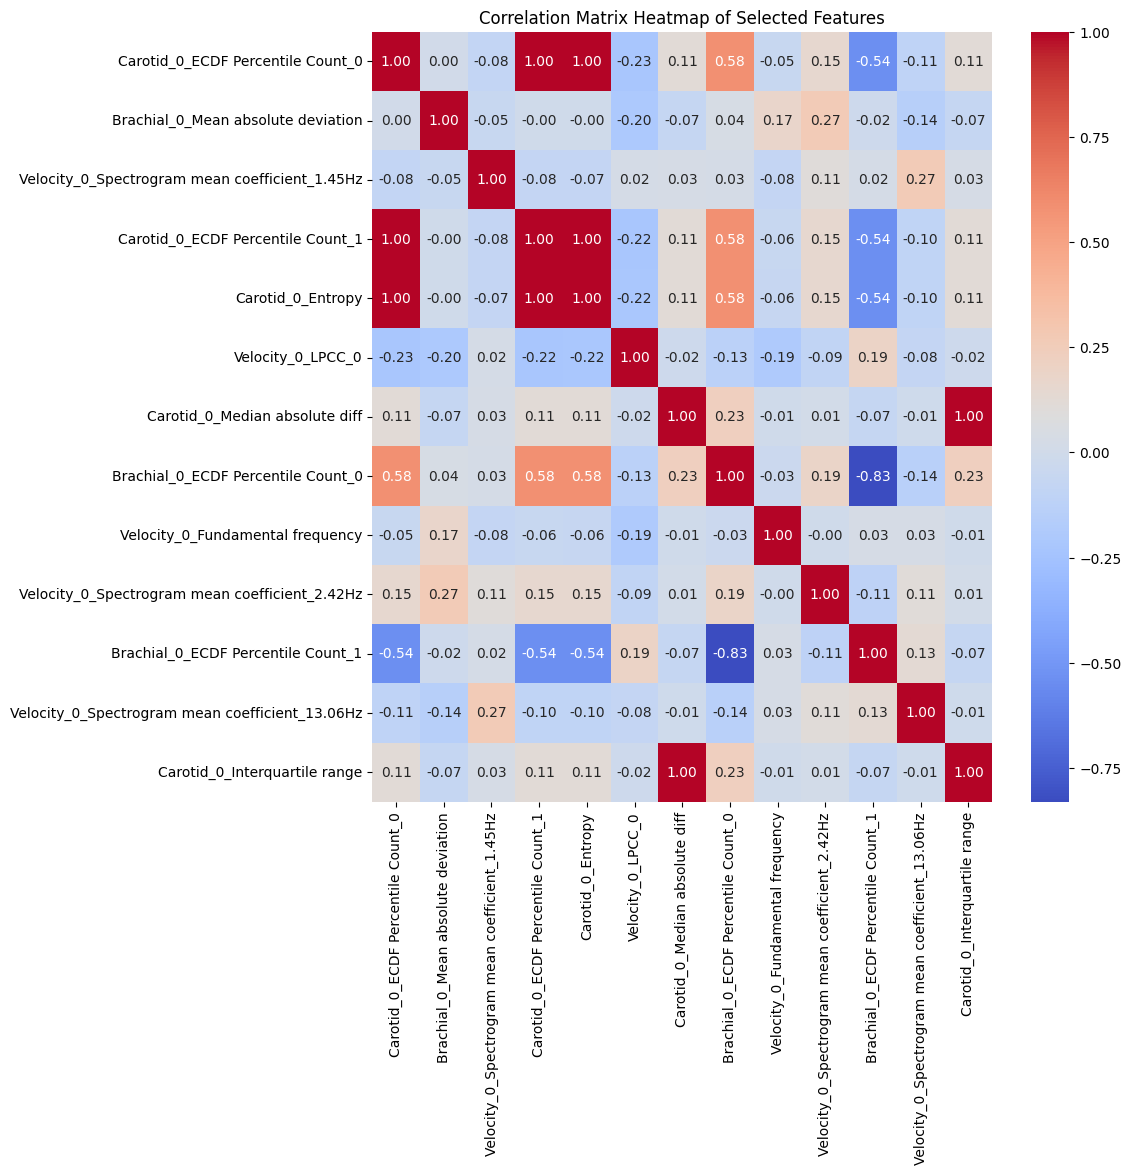

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' and 'selected_continuous_features' are defined as in your code

# Calculate the correlation matrix for the selected continuous features
correlation_matrix_2 = df[selected_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Selected Features')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

###Plot the MI score for the second feature sets gotten by m.RMR instead of MI

{'Carotid_0_ECDF Percentile Count_0': np.float64(0.09755792934453789), 'Brachial_0_Mean absolute deviation': np.float64(0.0050350706254105315), 'Velocity_0_Spectrogram mean coefficient_1.45Hz': np.float64(0.0455993737412681), 'Carotid_0_ECDF Percentile Count_1': np.float64(0.03377428706089569), 'Carotid_0_Entropy': np.float64(0.1275823156237934), 'Velocity_0_LPCC_0': np.float64(0.051871227618963234), 'Carotid_0_Median absolute diff': np.float64(0.0), 'Brachial_0_ECDF Percentile Count_0': np.float64(0.08764538263000188), 'Velocity_0_Fundamental frequency': np.float64(0.0), 'Velocity_0_Spectrogram mean coefficient_2.42Hz': np.float64(0.0008565497437043046), 'Brachial_0_ECDF Percentile Count_1': np.float64(0.0), 'Velocity_0_Spectrogram mean coefficient_13.06Hz': np.float64(0.02994196519814385), 'Carotid_0_Interquartile range': np.float64(0.06746488274190532)}
{'Carotid_0_Entropy': np.float64(0.1275823156237934), 'Carotid_0_ECDF Percentile Count_0': np.float64(0.09755792934453789), 'Brachi

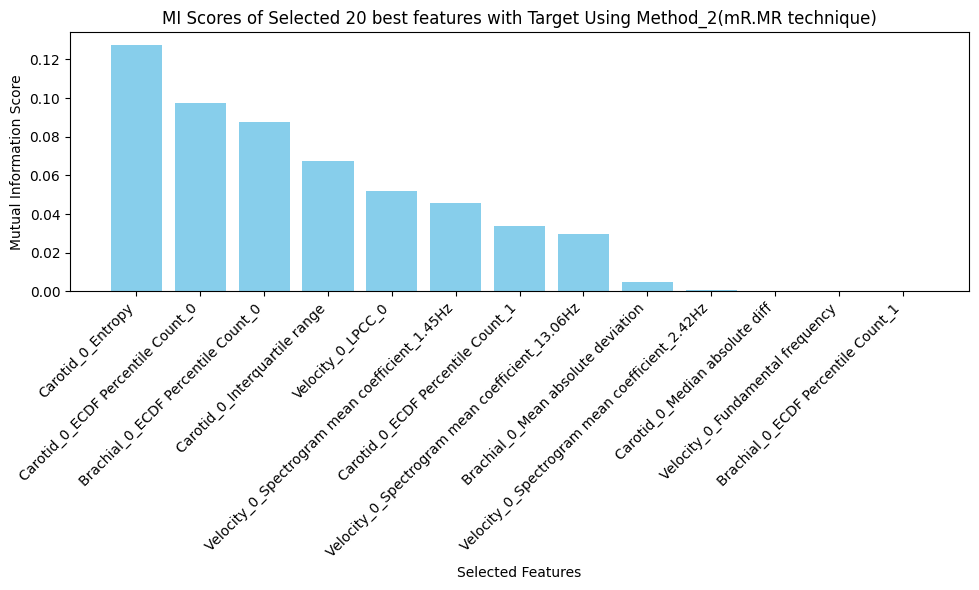

Selected top 13 features:
Carotid_0_Entropy: 0.1275823156237934
Carotid_0_ECDF Percentile Count_0: 0.09755792934453789
Brachial_0_ECDF Percentile Count_0: 0.08764538263000188
Carotid_0_Interquartile range: 0.06746488274190532
Velocity_0_LPCC_0: 0.051871227618963234
Velocity_0_Spectrogram mean coefficient_1.45Hz: 0.0455993737412681
Carotid_0_ECDF Percentile Count_1: 0.03377428706089569
Velocity_0_Spectrogram mean coefficient_13.06Hz: 0.02994196519814385
Brachial_0_Mean absolute deviation: 0.0050350706254105315
Velocity_0_Spectrogram mean coefficient_2.42Hz: 0.0008565497437043046
Carotid_0_Median absolute diff: 0.0
Velocity_0_Fundamental frequency: 0.0
Brachial_0_ECDF Percentile Count_1: 0.0


In [ ]:


selected_dict = {k:sorted_mi_scores[k] for k in selected_features if k in sorted_mi_scores}
print(selected_dict)
sorted_selected_scores = dict(sorted(selected_dict.items(), key=lambda item: item[1], reverse=True))
print(sorted_selected_scores)
features = list(sorted_selected_scores.keys()) #sorted(mi_scores, key=mi_scores.get, reverse=True)
mi_values = list(sorted_selected_scores.values())#[mi_scores[feature] for feature in features]

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(features, mi_values, color='skyblue')
plt.xlabel("Selected Features")
plt.ylabel("Mutual Information Score")
plt.title("MI Scores of Selected 20 best features with Target Using Method_2(mR.MR technique)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()
print("Selected top 13 features:")
for feature in sorted_selected_scores.keys():
  print(f"{feature}: {mi_scores[feature]}")

##PICK ONE FEATURE AMONG FEATURES THAT ARE PERFECTLY CORRELATED, `BASED ON MI SCORE`

In [ ]:
#Format to 2 significant features
formatted_corr_matrix_2 = correlation_matrix_2.round(2)
import pandas as pd

def find_perfect_correlations(corr_matrix):
    """
    Identify feature pairs with perfect correlation (1.0 or -1.0) from a correlation matrix.

    Parameters:
    corr_matrix (pd.DataFrame): A pandas DataFrame representing the correlation matrix.

    Returns:
    list: A list of tuples containing feature pairs and their correlation values.
    """
    perfect_pairs = []
    features = corr_matrix.columns
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if i != j:
              corr_value = corr_matrix.iloc[i, j]
              if corr_value == 1.00 or corr_value == -1.00:
                perfect_pairs.append((features[i], features[j], corr_value))
    return perfect_pairs

# Example usage:
# Assuming `corr_matrix` is your precomputed correlation matrix:
# perfect_corrs = find_perfect_correlations(corr_matrix)
# for pair in perfect_corrs:
#     print(f"Features {pair[0]} and {pair[1]} have correlation: {pair[2]}")
print(find_perfect_correlations(formatted_corr_matrix_2))

[('Carotid_0_ECDF Percentile Count_0', 'Carotid_0_ECDF Percentile Count_1', np.float64(1.0)), ('Carotid_0_ECDF Percentile Count_0', 'Carotid_0_Entropy', np.float64(1.0)), ('Carotid_0_ECDF Percentile Count_1', 'Carotid_0_Entropy', np.float64(1.0)), ('Carotid_0_Median absolute diff', 'Carotid_0_Interquartile range', np.float64(1.0))]


In [ ]:
selected_features_3=[]
feature_list = ['Carotid_0_ECDF Percentile Count_1','Carotid_0_ECDF Percentile Count_0','Carotid_0_Median absolute diff']
for feature in selected_features:
  if feature not in feature_list:
      selected_features_3.append(feature)
  else:
    continue
print(len(selected_features_3))

10


#THEN LET'S SEE IF THERE IS AN INCREASE WITH AN FEATURESET_1 + FEATURESET_2

In [ ]:
def combine_lists_without_redundancy(list1, list2):
  """Combines two lists of column names, removing redundancy.

  Args:
    list1: The first list of column names.
    list2: The second list of column names.

  Returns:
    A new list containing unique and common column names without repetition.
  """

  list1_unique = list(set(list1) - set(list2))
  list2_unique = list(set(list2) - set(list1))
  common_elements = list(set(list1) & set(list2))
  print(common_elements)
  new_list = list1_unique + list2_unique + common_elements

  return new_list
both_list= combine_lists_without_redundancy(selected_features_2,selected_features)
print(both_list)

['Brachial_0_ECDF Percentile Count_0', 'Carotid_0_Entropy']
['Velocity_0_Spectrogram mean coefficient_6.29Hz', 'Velocity_0_MFCC_0', 'Velocity_0_Wavelet standard deviation_2.5Hz', 'Velocity_0_LPCC_3', 'Brachial_0_Median', 'Carotid_0_Slope', 'Velocity_0_LPCC_5', 'Carotid_0_Centroid', 'Velocity_0_Spectrogram mean coefficient_4.35Hz', 'Velocity_0_Spectrogram mean coefficient_11.61Hz', 'Velocity_0_Spectrogram mean coefficient_6.77Hz', 'Velocity_0_Spectrogram mean coefficient_2.42Hz', 'Carotid_0_Median absolute diff', 'Carotid_0_ECDF Percentile Count_1', 'Brachial_0_ECDF Percentile Count_1', 'Velocity_0_Spectrogram mean coefficient_1.45Hz', 'Velocity_0_LPCC_0', 'Carotid_0_ECDF Percentile Count_0', 'Velocity_0_Fundamental frequency', 'Velocity_0_Spectrogram mean coefficient_13.06Hz', 'Brachial_0_Mean absolute deviation', 'Carotid_0_Interquartile range', 'Brachial_0_ECDF Percentile Count_0', 'Carotid_0_Entropy']


##PCA ON THE SELECTED FEATURES

**Normalize the selected features**

In [ ]:
# We are going to do a PCA on the selected 20 features
selected_data = df[selected_features_3]  # Extracting the selected features(list of column names)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)


In [ ]:
print(selected_data.head)

<bound method NDFrame.head of      Brachial_0_Mean absolute deviation  \
0                             15.691485   
1                             24.003456   
2                             18.564798   
3                             16.235167   
4                             22.147677   
..                                  ...   
145                           14.423674   
146                           12.917880   
147                           13.080553   
148                           14.633871   
149                           14.581473   

     Velocity_0_Spectrogram mean coefficient_1.45Hz  Carotid_0_Entropy  \
0                                         43.768848           0.997768   
1                                         33.288859           0.997768   
2                                          2.732623           0.997768   
3                                         11.064716           1.000000   
4                                         10.836013           1.000000   
..       

In [ ]:
#Apply PCA
k=10
pca = PCA(n_components=k, random_state=42)  # add a random state to make it reproducible
pca_features= pca.fit_transform(scaled_data)


In [ ]:
#Create a dataframe with PCA features
pca_df = pd.DataFrame(data=pca_features, columns=[f'PC{i+1}' for i in range(k)])
pca_df['risk_label']=df['risk_label']   #adding our target variable to the dataframe
pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,risk_label
0,-0.805254,0.085435,-0.313674,-0.451438,0.314405,0.220352,0.178795,-0.116510,-0.281275,-0.022678,1
1,0.435443,3.468700,0.483228,-1.670057,0.902922,-1.436029,0.380887,-0.696742,-1.079131,-0.055035,1
2,-0.276211,1.496876,-1.467292,0.660314,-0.202437,-1.409683,1.091142,0.251146,-0.793728,0.232940,1
3,0.244108,0.080053,-0.648821,-0.993708,0.276615,-0.683641,-1.417957,-0.234802,1.304089,-0.250744,1
4,3.420830,0.697639,-0.997055,-0.728324,-0.123907,0.131210,-0.236333,1.413989,0.170919,0.472733,1


## Now we can generate an MI score for the PCA features.
**and also judge whether how we normalized the features before PCA component gain affects the MI scores of generated PCA features.**

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mi_score_pca={}
for col in pca_df.columns:
    if col != 'risk_label':
        mi_score_pca[col] = mutual_info_regression(pca_df[[col]], pca_df['risk_label'])[0]
print(mi_score_pca)

{'PC1': np.float64(0.10022856435000804), 'PC2': np.float64(0.017363034802063027), 'PC3': np.float64(0.07707112562756002), 'PC4': np.int64(0), 'PC5': np.int64(0), 'PC6': np.float64(0.03976828274680866), 'PC7': np.int64(0), 'PC8': np.int64(0), 'PC9': np.int64(0), 'PC10': np.float64(0.027740076901346278)}


0.262171084427786


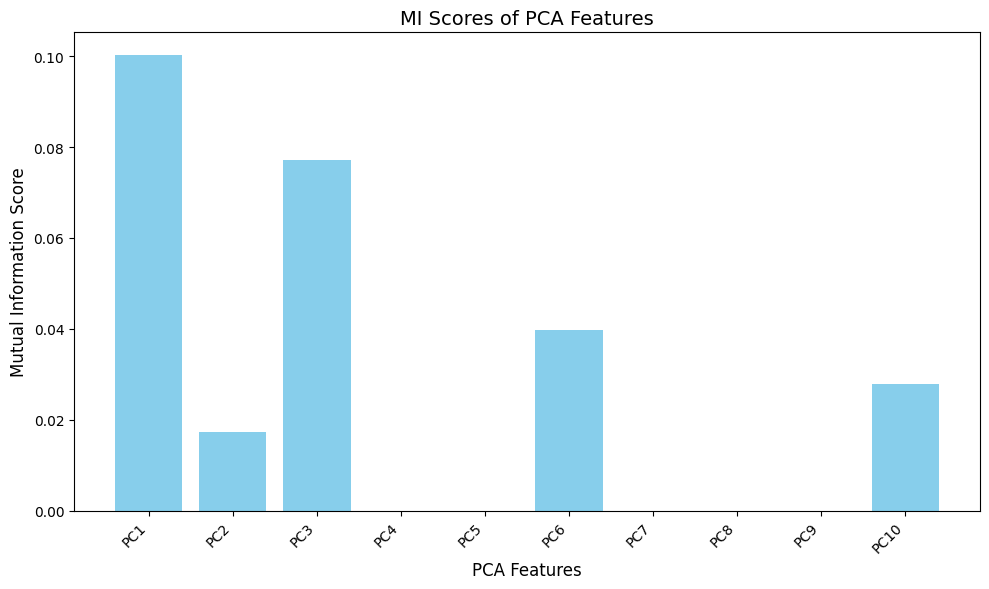

In [ ]:
import matplotlib.pyplot as plt
# Plotting
pca_features = list(mi_score_pca.keys())
mi_scores = list(mi_score_pca.values())
print(sum(mi_scores))
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(pca_features, mi_scores, color='skyblue')
plt.xlabel("PCA Features", fontsize=12)
plt.ylabel("Mutual Information Score", fontsize=12)
plt.title("MI Scores of PCA Features", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
print(pca_df)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -1.317186  0.101508  0.060016 -0.345694  0.567663 -0.052818 -0.054245   
1   -0.556540 -0.695650  3.565895 -0.142404  1.633053  1.220693 -1.029098   
2   -0.951020 -0.344182  1.197237 -1.721034 -0.608766  0.036748 -1.785845   
3    1.603761 -0.639527 -0.441043 -0.482248  0.169362  2.140097  1.254697   
4    3.702110 -0.970967  0.671170 -1.030754  1.065327 -0.535981  0.068539   
..        ...       ...       ...       ...       ...       ...       ...   
145  1.825473 -0.636880  0.089690  0.035119 -1.389653  0.991491 -1.186623   
146 -1.970774  0.667842  0.231803  4.252678 -1.965576 -0.690485  0.146576   
147 -1.915488  0.650619  0.245375  4.247241 -1.968379 -0.657006  0.145739   
148 -1.339067  0.143224 -0.251383 -0.498698  0.091472 -0.159471 -0.143669   
149 -1.354223  0.147549 -0.256369 -0.496731  0.091531 -0.168910 -0.143066   

          PC8       PC9      PC10      PC11      PC12          PC13  \
0   

#Let's train a model and see which one is the best classifier:
* The *PCA features* ?  or   The *original features*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Or any other classifier
from sklearn.metrics import accuracy_score

In [ ]:
#split train and test data
X_pca = pca_df.drop('risk_label', axis=1)
y_pca = pca_df['risk_label']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca,stratify=y_pca , test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

And selected (original)features

In [ ]:
X_selected = df_general[selected_features_3]
y_selected = df_general['risk_label']

# First split into train + (validation + test)
X_train_selected, X_temp, y_train_selected, y_temp = train_test_split(
    X_selected, y_selected, test_size=0.4, stratify=y_selected, random_state=42
)

# Then split (validation + test) into validation + test
X_val_selected, X_test_selected, y_val_selected, y_test_selected = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Now you have:
# X_train, y_train: for training your model
# X_val, y_val: for evaluating your model during training and tuning hyperparameters
# X_test, y_test: for final evaluation of your model

print(X_train_selected.shape, X_val_selected.shape, X_test_selected.shape)

(90, 10) (30, 10) (30, 10)


First let's train with pca features

In [ ]:
model_pca = LogisticRegression()  # Or any other classifier
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Accuracy (PCA Model): {accuracy_pca}")

Accuracy (PCA Model): 0.7


Then with original features


In [ ]:
model_selected = LogisticRegression(random_state=42)  # Or any other classifier
model_selected.fit(X_train_selected, y_train_selected)
y_pred_selected = model_selected.predict(X_val_selected)
accuracy_selected = accuracy_score(y_val_selected, y_pred_selected)
print(f"Accuracy (Selected Features Model): {accuracy_selected}")
y_pred_selected_2 = model_selected.predict(X_test_selected)
accuracy_selected_2 = accuracy_score(y_test_selected, y_pred_selected_2)
print(f"Accuracy (Selected Features Model): {accuracy_selected_2}")

Accuracy (Selected Features Model): 0.8333333333333334
Accuracy (Selected Features Model): 0.7666666666666667


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# X_selected, y_selected are your 150×13 feature matrix and labels
model = LogisticRegression(random_state=42, max_iter=1000)

# Choose k=5 or k=10
k = 5

# Perform k-fold CV
scores = cross_val_score(
    model,
    X_selected,
    y_selected,
    cv=k,
    scoring='accuracy',
    n_jobs=-1,        # parallelize across all cores
    verbose=1         # shows progress
)

print(f"{k}-fold CV accuracies: {scores}")
print(f"Mean accuracy: {scores.mean():.3f} ± {scores.std():.3f}")


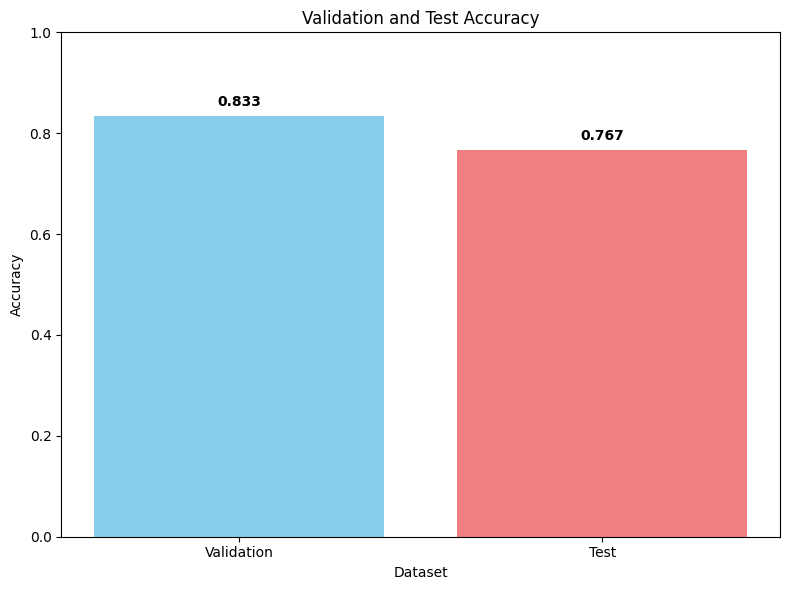

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already calculated accuracy_selected and accuracy_selected_2

# Data for plotting
datasets = ['Validation', 'Test']
accuracies = [accuracy_selected, accuracy_selected_2]

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(datasets, accuracies, color=['skyblue', 'lightcoral'])

# Customize the chart
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.title("Validation and Test Accuracy")
plt.ylim([0, 1])  # Set y-axis limits for better visualization

# Add accuracy values as text on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, str(round(v, 3)), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
if accuracy_pca > accuracy_selected:
       print("PCA Model performs better.")
elif accuracy_selected > accuracy_pca:
       print("Selected Features Model performs better.")
else:
       print("Both models have similar performance.")

Selected Features Model performs better.


Ok selected features or original features performs almost same in predicting the target. So we are going to use another model like
###randomforest.

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#train with the model
model_pca_rf = RandomForestClassifier(random_state=37, class_weight=)
model_pca_rf.fit(X_train_pca, y_train_pca)
y_pred_pca_rf = model_pca_rf.predict(X_test_pca)
accuracy_pca_rf = accuracy_score(y_test_pca, y_pred_pca_rf)
print(f"Accuracy (PCA Model - Random Forest): {accuracy_pca_rf}")

model_selected_rf = RandomForestClassifier(n_estimators=150)
model_selected_rf.fit(X_train_selected, y_train_selected)
y_pred_selected_rf = model_selected_rf.predict(X_test_selected)
accuracy_selected_rf = accuracy_score(y_test_selected, y_pred_selected_rf)
print(f"Accuracy (Selected Features Model - Random Forest): {accuracy_selected_rf}")

Accuracy (PCA Model - Random Forest): 0.7333333333333333
Accuracy (Selected Features Model - Random Forest): 0.7333333333333333


In [ ]:
if accuracy_pca_rf > accuracy_selected_rf:
       print("PCA Model performs better.")
elif accuracy_selected_rf > accuracy_pca_rf:
       print("Selected Features Model performs better.")
else:
       print("Both models have similar performance.")

Both models have similar performance.


##XGBOOST


In [ ]:
import xgboost
from xgboost import XGBClassifier

# Assuming X_train_selected, y_train_selected, X_test_selected are defined

model_selected_xgb = XGBClassifier(n_estimators=150, max_depth=10,
                                    min_child_weight=5,  # Similar to min_samples_leaf
                                    subsample=0.8,  # Similar to bootstrap
                                    colsample_bytree=0.8,  # Similar to max_features
                                    learning_rate=0.1,  # Controls step size
                                    objective='binary:logistic',  # For binary classification
                                    eval_metric='logloss',  # Evaluation metric
                                    random_state=42)  # For reproducibility

model_selected_xgb.fit(X_train_selected, y_train_selected)
y_pred_selected_xgb = model_selected_xgb.predict(X_test_selected)
accuracy_selected_xgb = accuracy_score(y_test_selected, y_pred_selected_xgb)
print(f"Accuracy (Selected Features Model - XGBoost): {accuracy_selected_xgb}")

#PCA XGBOOST
model_pca_xgb = XGBClassifier(random_state=37)  # Using the same random_state as before
model_pca_xgb.fit(X_train_pca, y_train_pca)
y_pred_pca_xgb = model_pca_xgb.predict(X_test_pca)
accuracy_pca_xgb = accuracy_score(y_test_pca, y_pred_pca_xgb)
print(f"Accuracy (PCA Model - XGBoost): {accuracy_pca_xgb}")


Accuracy (Selected Features Model - XGBoost): 0.7333333333333333
Accuracy (PCA Model - XGBoost): 0.6333333333333333


## Let's see which PCA feature sets has highest variance

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
ranked_components = sorted([(i + 1, var) for i, var in enumerate(explained_variance)], key=lambda x: x[1], reverse=True)

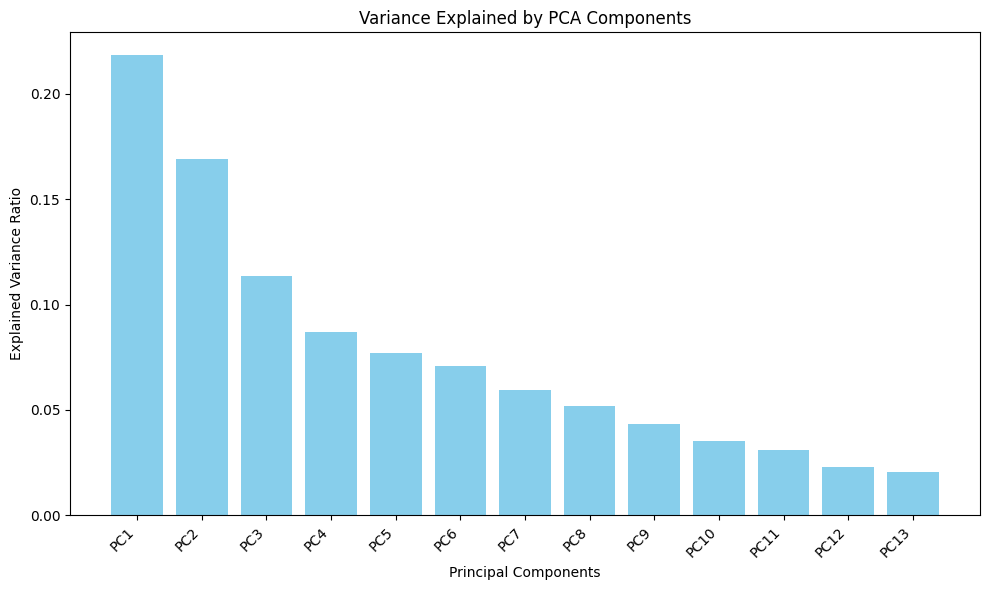

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar([f"PC{i}" for i, _ in ranked_components], [var for _, var in ranked_components], color='skyblue')
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Variance Explained by PCA Components")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**We can take the 13 selected features which has 84% accuracy in logistic regression models.**

*SAVE THE *best_feature_df* * and add it to other types of features like shapelets from you other notebooks. See if they could provide a new descriptor(new_info) compared with the other features.

In [ ]:
len(selected_features_3)
selected_features_3.append('filename')


In [ ]:
selected_features_3.append('risk_label')

In [ ]:
best_feature_df = df[selected_features_3]
best_feature_df.shape

(150, 12)

In [ ]:
best_feature_df.head()

,Brachial_0_Mean absolute deviation,Velocity_0_Spectrogram mean coefficient_1.45Hz,Carotid_0_Entropy,Velocity_0_LPCC_0,Brachial_0_ECDF Percentile Count_0,Velocity_0_Fundamental frequency,Velocity_0_Spectrogram mean coefficient_2.42Hz,Brachial_0_ECDF Percentile Count_1,Velocity_0_Spectrogram mean coefficient_13.06Hz,Carotid_0_Interquartile range,filename,risk_label
0,15.691485,43.768848,0.997768,0.327155,25.0000,0.234375,6.476799,102.0000,0.025786,0.235829,6249856R,1
1,24.003456,33.288859,0.997768,0.184347,25.0000,0.234375,27.969342,102.0000,0.015645,0.442449,6182440R,1
2,18.564798,2.732623,0.997768,0.182303,25.0000,0.234375,2.013518,102.0000,0.002509,0.298551,9226581R,1
3,16.235167,11.064716,1.000000,0.373026,25.0000,0.234375,12.929606,102.0000,0.078935,0.242882,6405034R,1
4,22.147677,10.836013,1.000000,0.297190,83.3687,0.234375,8.114827,83.3687,0.039012,0.298696,763607L,1


In [ ]:
best_feature_df.to_csv('/content/drive/MyDrive/A_RESEARCH_TRAINING/FEATURE_ENGINEERING_TRADITIONAL_ML/best_feature2_df.csv')